In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ecom_CRM_analysis.csv', encoding='latin1')

# 1. Perform a preliminary data inspection and data cleaning.

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df[["InvoiceNo", "StockCode", "CustomerID", 'Country']].nunique()

,0
InvoiceNo,25900
StockCode,4070
CustomerID,4372
Country,38


In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


a. Handling missing data Treatment.
1. We will drop all the records where the customer ID is Null as it has no significance 2. The records where Description is Null will be automatically treated when discarding records with missing values of customer ID 3. Customer ID and description now do not having missing values after treatment

In [ ]:
# drop rows with description missing
df.dropna(subset=['CustomerID'], inplace=True)

b. Remove duplicate data records.

In [ ]:
print("No of rows before dropping duplicate")
print(df.shape)
df.drop_duplicates(inplace=True)
print("No of rows after dropping duplicate")
print(df.shape)

No of rows before dropping duplicate
(406829, 8)
No of rows after dropping duplicate
(401604, 8)


In [ ]:
df[["InvoiceNo", "StockCode", "CustomerID", 'Country']].nunique()

,0
InvoiceNo,22190
StockCode,3684
CustomerID,4372
Country,37


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


c. Remove the transactions of the last month in year 2011 as they have only data for 9 days

In [ ]:
# Ensure InvoiceDate is in datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extract the date part from InvoiceDate
df["Date"] = df["InvoiceDate"].dt.date
print("Rows before dropping date")
print(df.shape)
df = df[df["Date"] < pd.to_datetime("2011-12-01").date()].copy()
print("Rows after dropping date")
print(df.shape)
df.head()

Rows before dropping date
(401604, 9)
Rows after dropping date
(384222, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [ ]:
df["InvoiceDate"].dtypes

dtype('<M8[ns]')

In [ ]:
#EDA
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df['CustomerID']=df['CustomerID'].astype(object)

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,object
Country,object
Date,object


In [ ]:
# get discrioption which contain ?
df.drop(df[df['Description'].str.contains('\?', na=False)].index, inplace=True)

In [ ]:
df.describe(exclude=None)

,Quantity,InvoiceDate,UnitPrice
count,384222.000000,384222,384222.000000
mean,12.205545,2011-07-03 19:21:33.944750848,3.502443
min,-74215.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-01 11:34:00,1.250000
50%,5.000000,2011-07-20 12:58:00,1.950000
75%,12.000000,2011-10-12 09:37:15,3.750000
max,74215.000000,2011-11-30 17:42:00,38970.000000
std,176.786144,NaN,71.249977


In [ ]:
# printing no of unique InvoiceNo StockCode	Description	CustomerID	Country
print(df[['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']].nunique())

InvoiceNo      21269
StockCode       3676
Description     3887
CustomerID      4331
Country           37
dtype: int64


In [ ]:
df["Date"]=df["InvoiceDate"].dt.date

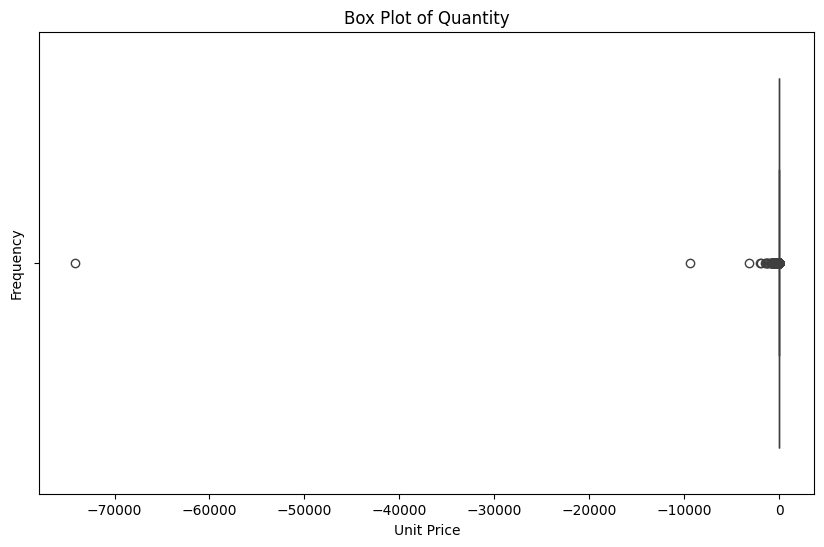

In [ ]:
#checking for out liers with box plot for unit price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[df['Quantity']<0]["Quantity"])
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Box Plot of Quantity')
plt.show()

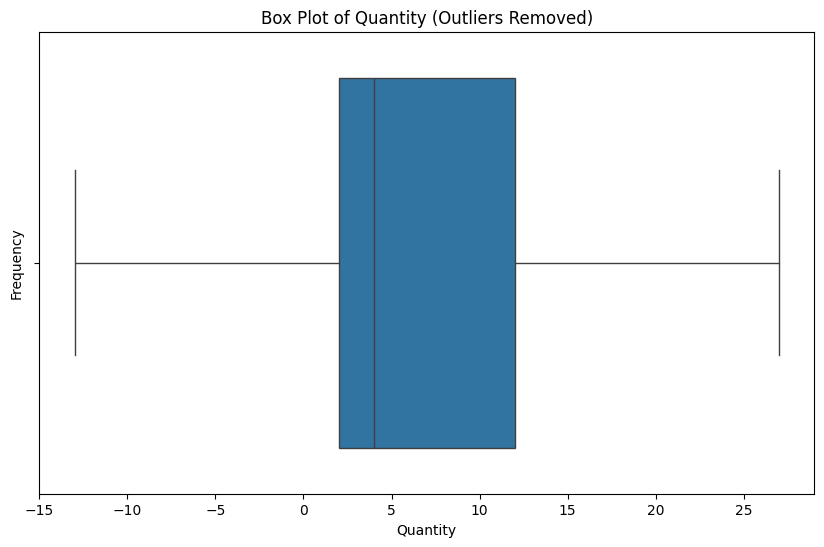

In [ ]:

# Remove outliers from 'Quantity' using IQR method
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

# Plot the distribution of Quantity after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Box Plot of Quantity (Outliers Removed)')
plt.show()

# You can also explore other columns for outliers and remove them similarly.
# For example, you could do the same for 'UnitPrice'

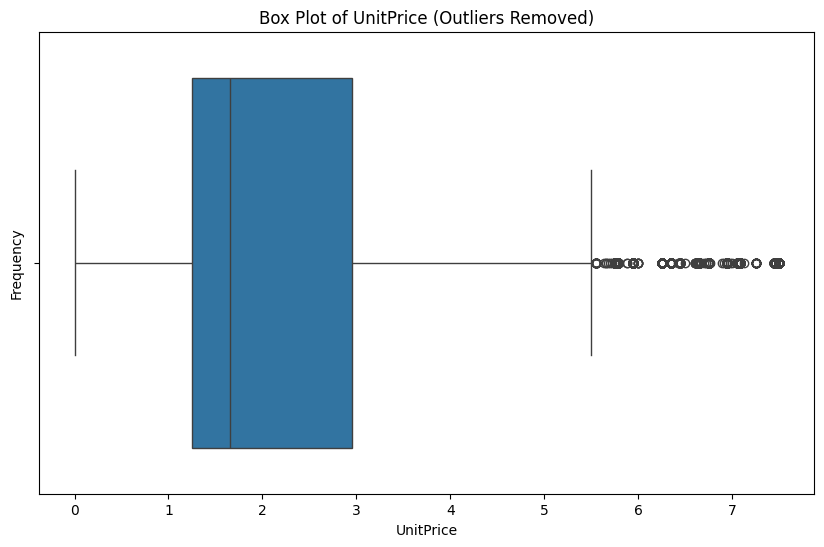

In [ ]:
# same for UnitPrice remove outlier and plot again

# Remove outliers from 'UnitPrice' using IQR method
Q1_UnitPrice = df_no_outliers['UnitPrice'].quantile(0.25)
Q3_UnitPrice = df_no_outliers['UnitPrice'].quantile(0.75)
IQR_UnitPrice = Q3_UnitPrice - Q1_UnitPrice
lower_bound_UnitPrice = Q1_UnitPrice - 1.5 * IQR_UnitPrice
upper_bound_UnitPrice = Q3_UnitPrice + 1.5 * IQR_UnitPrice

df_no_outliers_UnitPrice = df_no_outliers[(df_no_outliers['UnitPrice'] >= lower_bound_UnitPrice) & (df_no_outliers['UnitPrice'] <= upper_bound_UnitPrice)]

# Plot the distribution of UnitPrice after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers_UnitPrice['UnitPrice'])
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Box Plot of UnitPrice (Outliers Removed)')
plt.show()

In [ ]:
df2=df_no_outliers_UnitPrice
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
516378,C579886,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,-3,2011-11-30 17:39:00,6.75,15676.0,United Kingdom,2011-11-30
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-30
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-30
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-30


In [ ]:
print(df2[['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']].nunique())

InvoiceNo      18650
StockCode       3396
Description     3578
CustomerID      4184
Country           37
dtype: int64


In [ ]:
#no of cancelled transaction
df2[df2['InvoiceNo'].str.startswith('C')]['InvoiceNo'].nunique()

2534

In [ ]:
df_cancelled=df2[df2['InvoiceNo'].str.startswith('C')]
df_cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,2010-12-01
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
516378,C579886,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,-3,2011-11-30 17:39:00,6.75,15676.0,United Kingdom,2011-11-30
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-30
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-30
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-30


In [ ]:
df_cancelledand_return=df2[df2["Quantity"]<0]
df_cancelledand_return

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,2010-12-01
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,2010-12-01
...,...,...,...,...,...,...,...,...,...
516378,C579886,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,-3,2011-11-30 17:39:00,6.75,15676.0,United Kingdom,2011-11-30
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-30
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-30
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-30


In [ ]:
#TOtal sales and Quntity of goods sold
total_sales=(df2["Quantity"]*df2["UnitPrice"]).sum()
total_items_sold=df2["Quantity"].sum()
total_items_sold, total_sales

(2389218, 4075265.144)

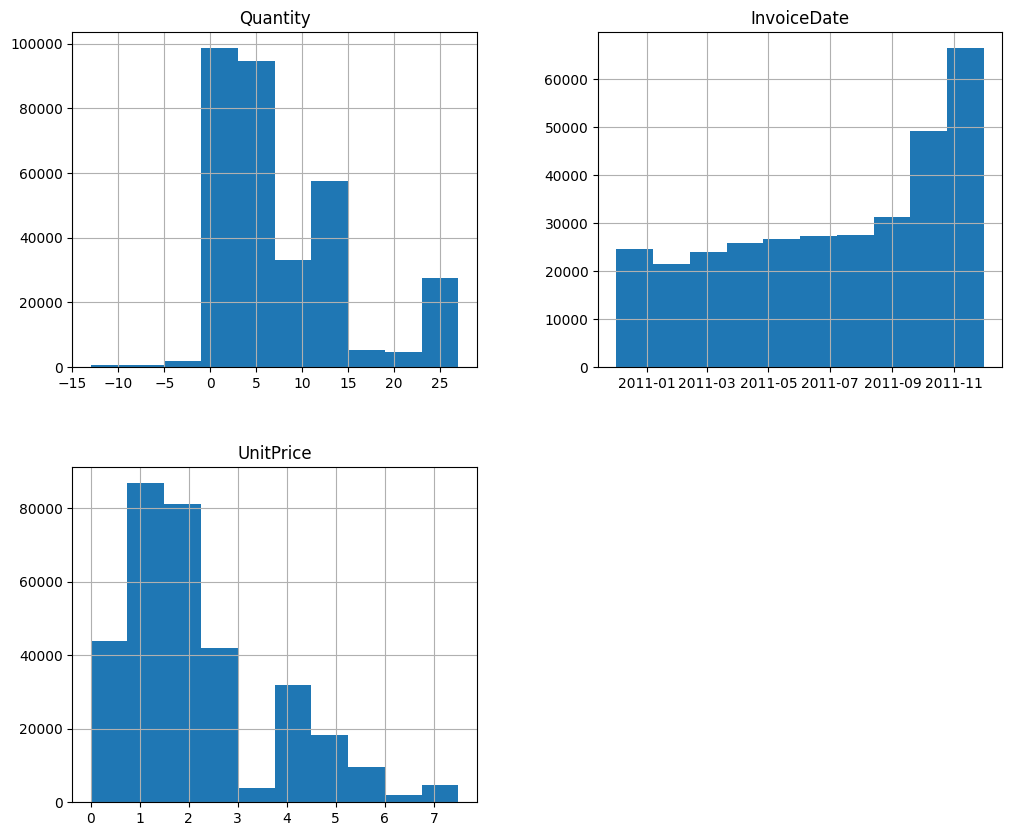

In [ ]:
# Visualize the distribution of numerical features using histograms
df2.hist(figsize=(12, 10))
plt.show()

# More specific analysis can be added depending on your needs.
# For example, time series analysis for 'InvoiceDate',
# analysis of sales trends by country, etc.

In [ ]:
#top 10 most ferqunlty sold products
top_10 = df2['Description'].value_counts().head(10).reset_index()
top_10

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,1662
1,JUMBO BAG RED RETROSPOT,1323
2,PARTY BUNTING,1265
3,LUNCH BAG RED RETROSPOT,1199
4,SET OF 3 CAKE TINS PANTRY DESIGN,1150
5,ASSORTED COLOUR BIRD ORNAMENT,1125
6,LUNCH BAG BLACK SKULL.,1005
7,SPOTTY BUNTING,958
8,LUNCH BAG SPACEBOY DESIGN,943
9,LUNCH BAG CARS BLUE,931


In [ ]:
bottem_10=df2.groupby(["StockCode","Description"])["Description"].count().sort_values(ascending=True).head(10)
bottem_10

,,Description
StockCode,Description,
90195B,BLACK GEMSTONE BRACELET,1
44242A,LILAC FEATHERS CURTAIN,1
35597A,DUSTY PINK CHRISTMAS TREE 30CM,1
79157B,UBO-LIGHT TRIOBASE BLUE,1
23428,IVORY RETRO KITCHEN WALL CLOCK,1
35597B,BLACKCHRISTMAS TREE 30CM,1
77079,DOLPHIN WINDMILL,1
37487B,YELLOW/ORANGE FLOWER DESIGN PLATE,1
20827,GOLD APERITIF GLASS,1


In [ ]:
#total Sales
df2["TotalSales"]=round(df2["Quantity"]*df2["UnitPrice"],2)

<ipython-input-31-717553e626ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TotalSales"]=round(df2["Quantity"]*df2["UnitPrice"],2)


In [ ]:
#produts that are contibuting Highest to sales and quantity sold
sale_summery=df2.groupby("Description").agg(total_quntity_sold=("Quantity","sum"),total_sales=("TotalSales","sum")).sort_values(by="total_sales",ascending=False).reset_index()

#top 10% of products
quntity_threshold=sale_summery["total_quntity_sold"].quantile(0.90)
sales_threshold=sale_summery["total_sales"].quantile(0.90)
sale_summery=sale_summery[(sale_summery["total_quntity_sold"]>=quntity_threshold) & (sale_summery["total_sales"]>=sales_threshold)]
sale_summery.head(15)

,Description,total_quntity_sold,total_sales
0,PARTY BUNTING,6926,34148.40
1,WHITE HANGING HEART T-LIGHT HOLDER,10446,30772.62
2,JUMBO BAG RED RETROSPOT,11720,24010.50
3,SPOTTY BUNTING,4602,22758.10
4,ASSORTED COLOUR BIRD ORNAMENT,13220,22341.80
5,JAM MAKING SET WITH JARS,4864,19655.25
6,SET OF 3 CAKE TINS PANTRY DESIGN,4035,19470.07
7,HOT WATER BOTTLE KEEP CALM,3933,18316.35
8,CHILLI LIGHTS,3515,17770.75
9,RETROSPOT TEA SET CERAMIC 11 PC,3563,17035.55


In [ ]:
#produts with highest no of return and cancellations
df_cancelledand_return.groupby("Description")["InvoiceNo"].count().sort_values(ascending=False)

,InvoiceNo
Description,
JAM MAKING SET WITH JARS,84
SET OF 3 CAKE TINS PANTRY DESIGN,65
STRAWBERRY CERAMIC TRINKET BOX,50
ROSES REGENCY TEACUP AND SAUCER,49
POSTAGE,43
...,...
LARGE ANTIQUE WHITE PHOTO FRAME,1
LARGE BONNE JAM JAR T-LIGHT HOLDER,1
LARGE CAKE TOWEL PINK SPOTS,1


In [ ]:
#country vise count of no of unique transaction
df2.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False).reset_index(name="No_of_Transaction")

,Country,No_of_Transaction
0,United Kingdom,16742
1,Germany,522
2,France,380
3,EIRE,273
4,Belgium,107
5,Spain,88
6,Netherlands,64
7,Switzerland,57
8,Australia,52
9,Portugal,47


In [ ]:
#count of return or cancelled transaction
df_cancelledand_return.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending=False)

,InvoiceNo
Country,
United Kingdom,2244
Germany,112
EIRE,44
France,35
Belgium,18
Switzerland,14
Italy,13
Australia,7
Spain,7


In [ ]:
df2["InvoiceDate"].describe()

,InvoiceDate
count,324414
mean,2011-07-05 12:48:18.080600576
min,2010-12-01 08:26:00
25%,2011-04-03 15:22:00
50%,2011-07-24 11:40:00
75%,2011-10-13 12:59:00
max,2011-11-30 17:42:00


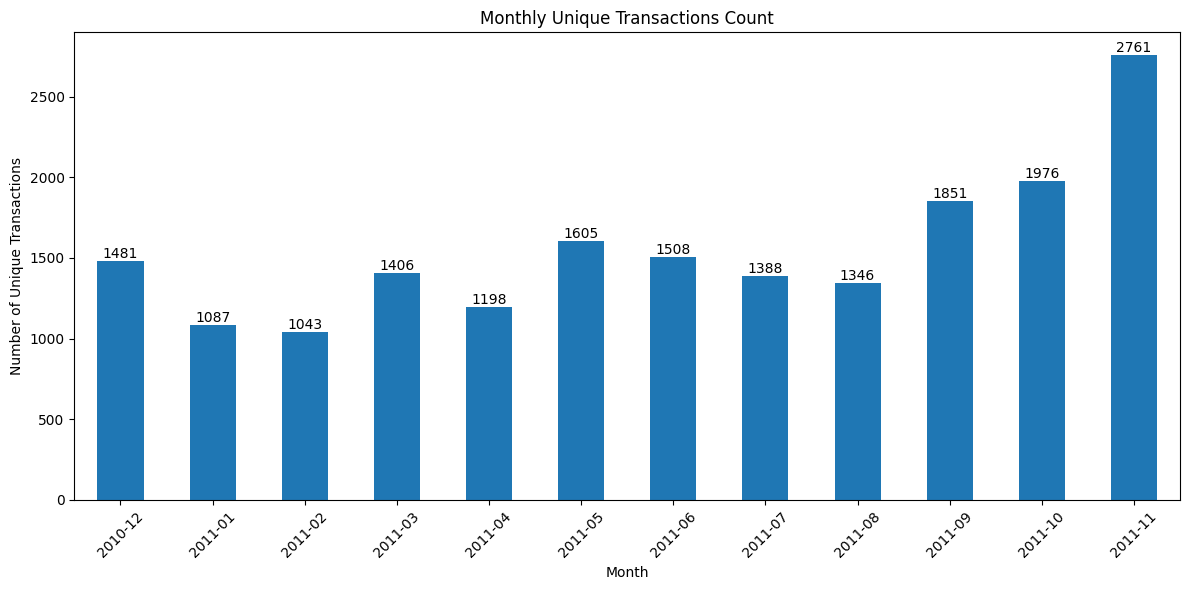

In [ ]:
# Group data by month and count unique invoices
monthly_transactions = df2.groupby(df2['InvoiceDate'].dt.to_period('M'))['InvoiceNo'].nunique()
# Create the plot
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='bar')
for i, v in enumerate(monthly_transactions):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Number of Unique Transactions')
plt.title('Monthly Unique Transactions Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

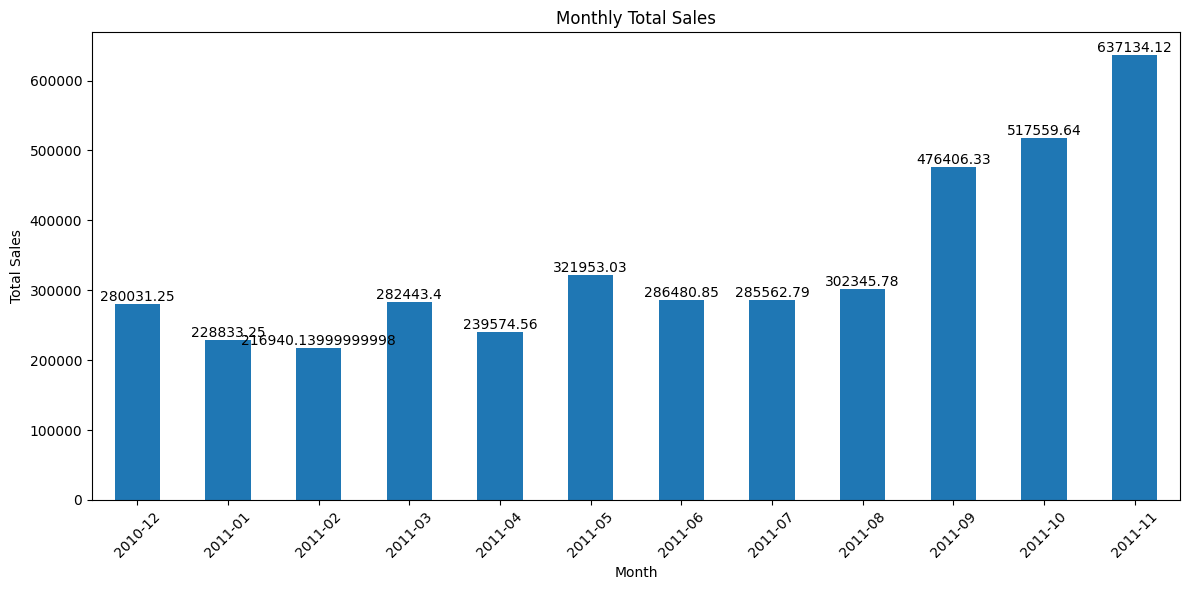

In [ ]:
Monthly_sales=df2.groupby(df2["InvoiceDate"].dt.to_period("M"))["TotalSales"].sum()
plt.figure(figsize=(12, 6))
Monthly_sales.plot(kind='bar')
for i, v in enumerate(Monthly_sales):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

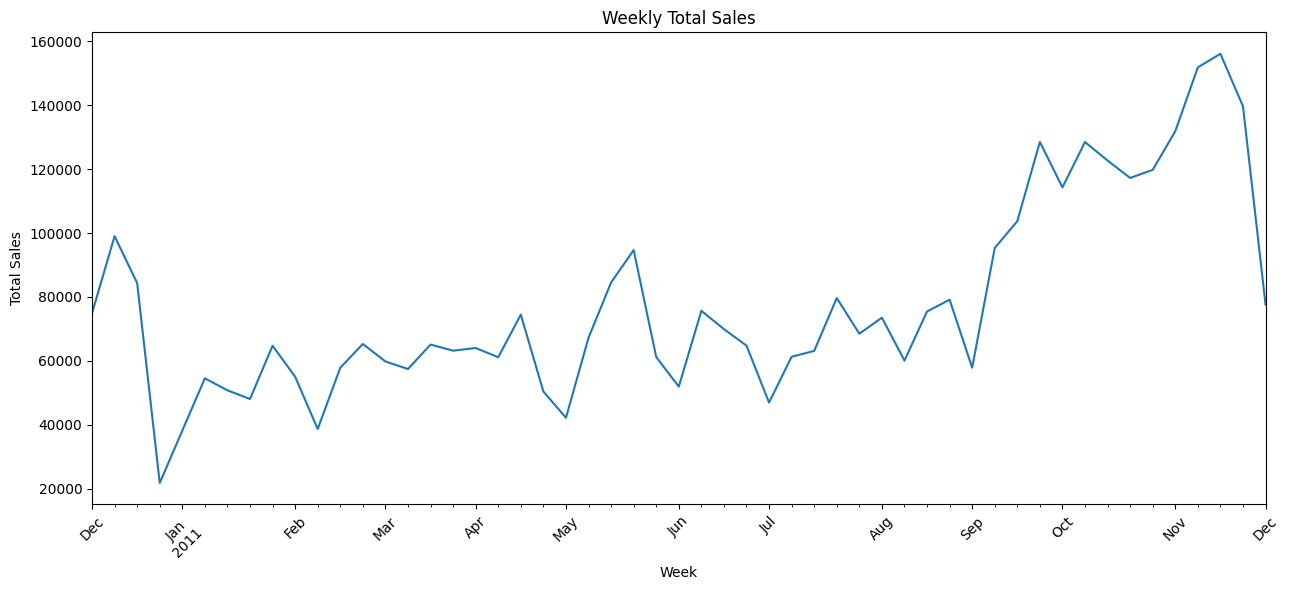

In [ ]:
#weekly total sales line chart
plt.figure(figsize=(13, 6))
weekly_sales = df2.groupby(df2['InvoiceDate'].dt.to_period('W'))['TotalSales'].sum()
weekly_sales.plot(kind='line')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.title('Weekly Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df2.groupby(df2['InvoiceDate'].dt.to_period('W'))['TotalSales'].sum().reset_index()

,InvoiceDate,TotalSales
0,2010-11-29/2010-12-05,74920.59
1,2010-12-06/2010-12-12,99033.84
2,2010-12-13/2010-12-19,84331.97
3,2010-12-20/2010-12-26,21744.85
4,2011-01-03/2011-01-09,54523.65
5,2011-01-10/2011-01-16,50762.11
6,2011-01-17/2011-01-23,48046.63
7,2011-01-24/2011-01-30,64722.96
8,2011-01-31/2011-02-06,55022.14
9,2011-02-07/2011-02-13,38646.15


## RFM Analysis

RFM Analysis
RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Recency (R):
Time since last purchase

Frequency (F):
Total number of purchases

Monetary (M):
Total purchase value

Benefits of RFM analysis
Increased customer retention Increased response rate Increased conversion rate Increased revenue

To perform RFM analysis, we divide customers into four equal groups according to the distribution of values for recency, frequency, and monetary value. Four equal groups across three variables create 64 (4x4x4) different customer segments, which is a manageable number.

For example, let’s look at a customer who: is within the group who purchased most recently (R=4), is within the group who purchased most quantity (F=4), is within the group who spent the most (M=4) This customer belongs to RFM segment 4-4-4 (Best Customers), (R=4, F=4, M=4)

## Recencey

In [ ]:
#lets assume current date as latest date in aur data
current_date=df2["InvoiceDate"].max().date()
current_date

datetime.date(2011, 11, 30)

In [ ]:
df2["Date"] = pd.to_datetime(df2["Date"], errors='coerce')  # Converts invalid dates to NaT

<ipython-input-42-b9ee031b690c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Date"] = pd.to_datetime(df2["Date"], errors='coerce')  # Converts invalid dates to NaT


In [ ]:
df2["Date"]

,Date
0,2010-12-01
1,2010-12-01
2,2010-12-01
3,2010-12-01
4,2010-12-01
...,...
516378,2011-11-30
516379,2011-11-30
516380,2011-11-30
516381,2011-11-30


In [ ]:
import datetime as dt
recency_df=df2.groupby("CustomerID")["Date"].max().reset_index()
recency_df=recency_df.assign(Current_date=current_date)
recency_df["Date"] = pd.to_datetime(recency_df["Date"])
recency_df["Current_date"] = pd.to_datetime(recency_df["Current_date"])
recency_df["Recency"]=(recency_df["Current_date"]-recency_df["Date"]).dt.days
recency_df

,CustomerID,Date,Current_date,Recency
0,12347.0,2011-10-31,2011-11-30,30
1,12348.0,2011-04-05,2011-11-30,239
2,12349.0,2011-11-21,2011-11-30,9
3,12350.0,2011-02-02,2011-11-30,301
4,12352.0,2011-11-03,2011-11-30,27
...,...,...,...,...
4179,18280.0,2011-03-07,2011-11-30,268
4180,18281.0,2011-06-12,2011-11-30,171
4181,18282.0,2011-08-09,2011-11-30,113
4182,18283.0,2011-11-30,2011-11-30,0


## Frequency and Monitrary value

In [ ]:
#calculating frequency
frequency_df=df2.groupby("CustomerID")["InvoiceNo"].nunique().reset_index().rename(columns={"InvoiceNo":"Frequency"})
frequency_df

,CustomerID,Frequency
0,12347.0,6
1,12348.0,3
2,12349.0,1
3,12350.0,1
4,12352.0,8
...,...,...
4179,18280.0,1
4180,18281.0,1
4181,18282.0,2
4182,18283.0,15


In [ ]:
#monitary value
monetary_df=df2.groupby("CustomerID")["TotalSales"].sum().reset_index().rename(columns={"TotalSales":"Monetary"})
monetary_df

,CustomerID,Monetary
0,12347.0,3089.91
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1010.61
...,...,...
4179,18280.0,137.00
4180,18281.0,46.92
4181,18282.0,59.34
4182,18283.0,1794.63


In [ ]:
#combining to one table
rfm_df=recency_df.merge(frequency_df,on="CustomerID").merge(monetary_df,on="CustomerID")
rfm_df

,CustomerID,Date,Current_date,Recency,Frequency,Monetary
0,12347.0,2011-10-31,2011-11-30,30,6,3089.91
1,12348.0,2011-04-05,2011-11-30,239,3,90.20
2,12349.0,2011-11-21,2011-11-30,9,1,999.15
3,12350.0,2011-02-02,2011-11-30,301,1,294.40
4,12352.0,2011-11-03,2011-11-30,27,8,1010.61
...,...,...,...,...,...,...
4179,18280.0,2011-03-07,2011-11-30,268,1,137.00
4180,18281.0,2011-06-12,2011-11-30,171,1,46.92
4181,18282.0,2011-08-09,2011-11-30,113,2,59.34
4182,18283.0,2011-11-30,2011-11-30,0,15,1794.63


In [ ]:

rfm_table=rfm_df[['CustomerID','Recency','Frequency','Monetary']]
rfm_table.set_index('CustomerID',inplace=True)
d=rfm_table.quantile([0.25,0.5,0.75]).to_dict()

def r_score(x,p,d):
  if x<=d[p][0.25]:
    return 4
  elif x<=d[p][0.50]:
    return 3
  elif x<=d[p][0.75]:
    return 2
  else:
    return 1
def fm_score(x,p,d):
  if x<=d[p][0.25]:
    return 1
  elif x<=d[p][0.50]:
    return 2
  elif x<=d[p][0.75]:
    return 3
  else:
    return 4

rfm_table['R_score']=rfm_table['Recency'].apply(r_score,args=('Recency',d))
rfm_table['F_score']=rfm_table['Frequency'].apply(fm_score,args=('Frequency',d))
rfm_table['M_score']=rfm_table['Monetary'].apply(fm_score,args=('Monetary',d))
rfm_table

<ipython-input-48-bbd818ed6b00>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_table['R_score']=rfm_table['Recency'].apply(r_score,args=('Recency',d))
<ipython-input-48-bbd818ed6b00>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_table['F_score']=rfm_table['Frequency'].apply(fm_score,args=('Frequency',d))


,Recency,Frequency,Monetary,R_score,F_score,M_score
CustomerID,,,,,,
12347.0,30,6,3089.91,3,4,4
12348.0,239,3,90.20,1,3,1
12349.0,9,1,999.15,4,1,3
12350.0,301,1,294.40,1,1,2
12352.0,27,8,1010.61,3,4,3
...,...,...,...,...,...,...
18280.0,268,1,137.00,1,1,1
18281.0,171,1,46.92,1,1,1
18282.0,113,2,59.34,2,2,1


In [ ]:
rfm_table["RFM_score"]=rfm_table["R_score"].astype(str)+rfm_table["F_score"].astype(str)+rfm_table["M_score"].astype(str)


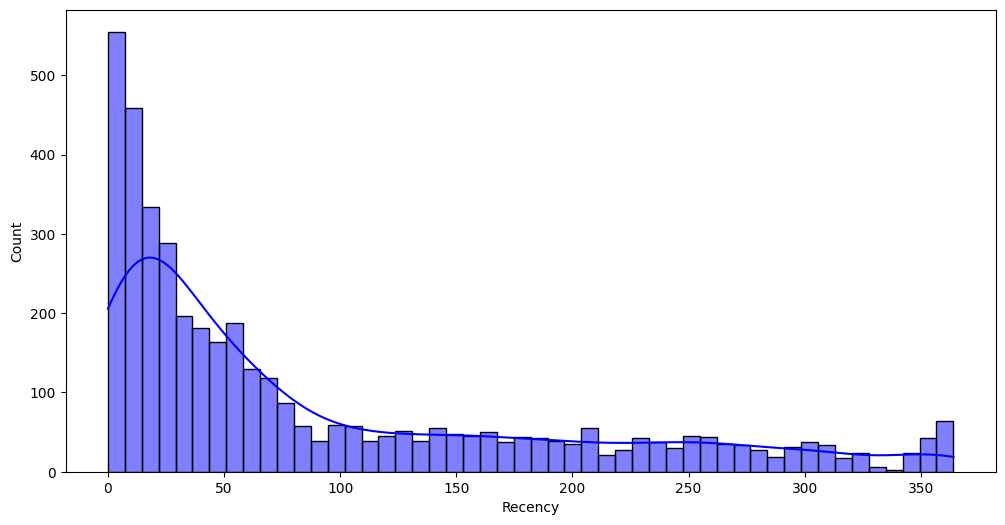

In [ ]:
#visualising histogram charts for Recency, Frequency and Monetary
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df["Recency"], bins=50, kde=True, color='blue', label='Recency')
plt.xlabel('Recency')
plt.show()

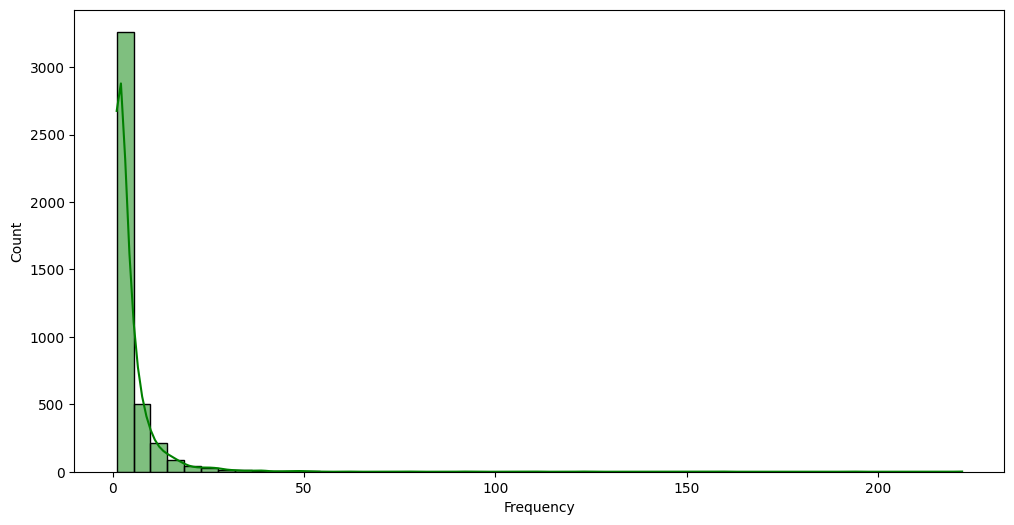

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df["Frequency"], bins=50, kde=True, color='green', label='Frequency')
plt.xlabel('Frequency')
plt.show()

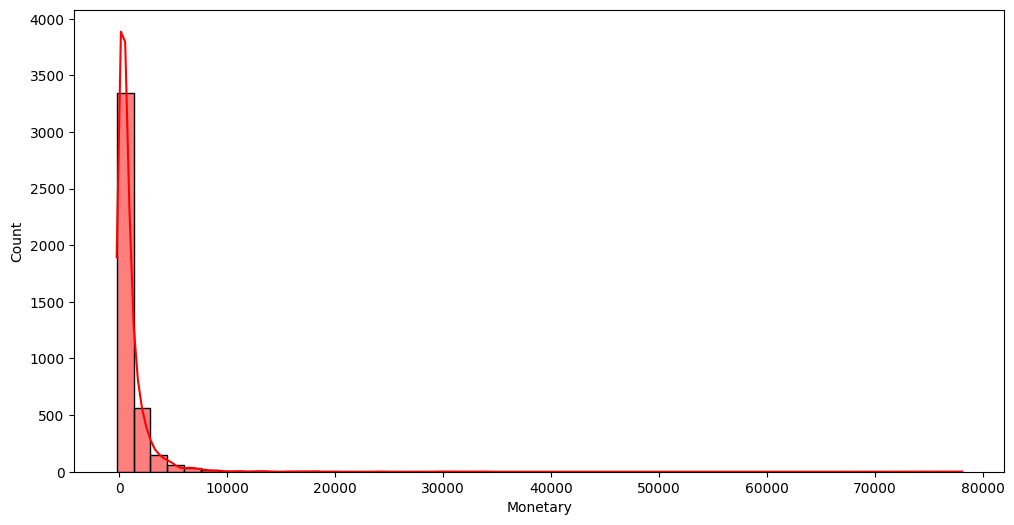

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df["Monetary"], bins=50, kde=True, color='red', label='Monetary')
plt.xlabel('Monetary')
plt.show()

Creating Customer Segment based on RFM scores based on our best of understanding

In [ ]:
Segment =  ['PlatinumCustomers',
                     'BigSpenders',
                     'HighSpendNewCustomers',
                     'LowestSpendingActiveLoyalCustomers',
                     'RecentCustomers',
                     'GoodCustomersAlmostLost',
                     'ChurnedBestCustomers',
                     'LostCheapCustomers']
RFM = [
               ['444', '443'],
               ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444'],
               ['413', '314', '313', '414'],
               ['331', '341', '431', '441'],
               ['422', '423', '424', '432', '433', '434', '442', '443', '444'],
               ['244', '234', '243', '233'],
               ['144', '134', '143', '133'],
               ['122', '111', '121', '112', '221', '212', '211']
               ]
# Create a dictionary for each segment to map them against each customer
Description = ['Customers who bought most recently, most often and spend the most',
               'Customers who spend the most',
               'New Customers who spend the most',
               'Active Customers who buy very often but spend less ',
               'Customers who have purchased recently',
               'Customers who were frequent and good spenders who are becoming very inactive',
               'Customers who were frequent and good spenders who are lost contributing to attrition',
               'Customers who purchased long ago , less frequent and very little']

Marketing = ['No price incentives, New products and Loyalty Programs',
                      'Market your most expensive products',
                      'Price Incentives',
                      'Promote economical cost effective products in daily use',
                      'Discounts and promote a variety of product sells',
                      'Aggressive Price Incentives',
                      'Monitor close communication with customers with constant feedback and rework ',
                      'Dont spend too much time to re-acquire',
                      ]
rfm_segments = pd.DataFrame({'Segment': Segment , 'RFM' : RFM , 'Description': Description, 'Marketing': Marketing})
rfm_segments

,Segment,RFM,Description,Marketing
0,PlatinumCustomers,"[444, 443]","Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
1,BigSpenders,"[114, 124, 134, 144, 214, 224, 234, 244, 314, ...",Customers who spend the most,Market your most expensive products
2,HighSpendNewCustomers,"[413, 314, 313, 414]",New Customers who spend the most,Price Incentives
3,LowestSpendingActiveLoyalCustomers,"[331, 341, 431, 441]",Active Customers who buy very often but spend ...,Promote economical cost effective products in ...
4,RecentCustomers,"[422, 423, 424, 432, 433, 434, 442, 443, 444]",Customers who have purchased recently,Discounts and promote a variety of product sells
5,GoodCustomersAlmostLost,"[244, 234, 243, 233]",Customers who were frequent and good spenders ...,Aggressive Price Incentives
6,ChurnedBestCustomers,"[144, 134, 143, 133]",Customers who were frequent and good spenders ...,Monitor close communication with customers wit...
7,LostCheapCustomers,"[122, 111, 121, 112, 221, 212, 211]","Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire


In [ ]:
#creating a dict for Segment and RFM
segment_dict = dict(zip(rfm_segments['Segment'], rfm_segments['RFM']))
segment_dict

{'PlatinumCustomers': ['444', '443'],
 'BigSpenders': ['114',
  '124',
  '134',
  '144',
  '214',
  '224',
  '234',
  '244',
  '314',
  '324',
  '334',
  '344',
  '414',
  '424',
  '434',
  '444'],
 'HighSpendNewCustomers': ['413', '314', '313', '414'],
 'LowestSpendingActiveLoyalCustomers': ['331', '341', '431', '441'],
 'RecentCustomers': ['422',
  '423',
  '424',
  '432',
  '433',
  '434',
  '442',
  '443',
  '444'],
 'GoodCustomersAlmostLost': ['244', '234', '243', '233'],
 'ChurnedBestCustomers': ['144', '134', '143', '133'],
 'LostCheapCustomers': ['122', '111', '121', '112', '221', '212', '211']}

In [ ]:
# Allocate segments to each customer as per the RFM score mapping
def find_value(value):
  for k,v in segment_dict.items():
    if value in v:
      return k

rfm_table["Segment"] = rfm_table["RFM_score"].apply(find_value)
rfm_table["Segment"] = rfm_table["Segment"].fillna("Other")
rfm_table

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
CustomerID,,,,,,,,
12347.0,30,6,3089.91,3,4,4,344,BigSpenders
12348.0,239,3,90.20,1,3,1,131,Other
12349.0,9,1,999.15,4,1,3,413,HighSpendNewCustomers
12350.0,301,1,294.40,1,1,2,112,LostCheapCustomers
12352.0,27,8,1010.61,3,4,3,343,Other
...,...,...,...,...,...,...,...,...
18280.0,268,1,137.00,1,1,1,111,LostCheapCustomers
18281.0,171,1,46.92,1,1,1,111,LostCheapCustomers
18282.0,113,2,59.34,2,2,1,221,LostCheapCustomers


In [ ]:
#join rfm_table with rfm_segments to get Description and marketing
rfm_table=rfm_table.merge(rfm_segments[["Segment","Description","Marketing"]],on="Segment")
rfm_table


,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
0,30,6,3089.91,3,4,4,344,BigSpenders,Customers who spend the most,Market your most expensive products
1,9,1,999.15,4,1,3,413,HighSpendNewCustomers,New Customers who spend the most,Price Incentives
2,301,1,294.40,1,1,2,112,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
3,195,1,29.30,1,1,1,111,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
4,205,1,219.00,1,1,2,112,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
...,...,...,...,...,...,...,...,...,...,...
2872,64,1,173.90,2,1,1,211,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
2873,268,1,137.00,1,1,1,111,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
2874,171,1,46.92,1,1,1,111,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
2875,113,2,59.34,2,2,1,221,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire


Platinum Customers - Most vlueable

In [ ]:
Segment=['PlatinumCustomers', 'BigSpenders','HighSpendNewCustomers', 'LowestSpendingActiveLoyalCustomers','RecentCustomers',
'GoodCustomersAlmostLost','ChurnedBestCustomers', 'LostCheapCustomers']
rfm_table[rfm_table["Segment"]=="PlatinumCustomers"]

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
11,2,12,3618.05,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
26,6,6,2466.70,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
30,6,15,1824.22,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
44,15,12,3631.76,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
60,0,17,2725.14,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
...,...,...,...,...,...,...,...,...,...,...
2844,12,15,3830.42,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
2847,2,20,3664.70,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
2848,0,10,1939.30,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
2854,0,18,1771.64,4,4,4,444,PlatinumCustomers,"Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."


Big Spenders

In [ ]:
#BigSpenders
rfm_table[rfm_table["Segment"]=="BigSpenders"].head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
0,30,6,3089.91,3,4,4,344,BigSpenders,Customers who spend the most,Market your most expensive products
5,236,2,1086.56,1,2,4,124,BigSpenders,Customers who spend the most,Market your most expensive products
6,24,1,3315.41,3,1,4,314,BigSpenders,Customers who spend the most,Market your most expensive products
8,48,5,3155.68,3,3,4,334,BigSpenders,Customers who spend the most,Market your most expensive products
9,43,3,1843.16,3,3,4,334,BigSpenders,Customers who spend the most,Market your most expensive products


In [ ]:
#HighSpendNewCustomers
rfm_table[rfm_table["Segment"]=="HighSpendNewCustomers"].head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
1,9,1,999.15,4,1,3,413,HighSpendNewCustomers,New Customers who spend the most,Price Incentives
17,16,1,531.73,3,1,3,313,HighSpendNewCustomers,New Customers who spend the most,Price Incentives
64,48,1,734.36,3,1,3,313,HighSpendNewCustomers,New Customers who spend the most,Price Incentives
82,44,1,561.94,3,1,3,313,HighSpendNewCustomers,New Customers who spend the most,Price Incentives
144,43,1,924.52,3,1,3,313,HighSpendNewCustomers,New Customers who spend the most,Price Incentives


In [ ]:
#LowestSpendingActiveLoyalCustomers
rfm_table[rfm_table["Segment"]=="LowestSpendingActiveLoyalCustomers"].head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
390,12,4,190.10,4,3,1,431,LowestSpendingActiveLoyalCustomers,Active Customers who buy very often but spend ...,Promote economical cost effective products in ...
491,6,3,159.40,4,3,1,431,LowestSpendingActiveLoyalCustomers,Active Customers who buy very often but spend ...,Promote economical cost effective products in ...
645,26,3,159.51,3,3,1,331,LowestSpendingActiveLoyalCustomers,Active Customers who buy very often but spend ...,Promote economical cost effective products in ...
908,40,3,46.80,3,3,1,331,LowestSpendingActiveLoyalCustomers,Active Customers who buy very often but spend ...,Promote economical cost effective products in ...
937,7,3,124.85,4,3,1,431,LowestSpendingActiveLoyalCustomers,Active Customers who buy very often but spend ...,Promote economical cost effective products in ...


Customers who have purchased recently

In [ ]:
#RecentCustomers
rfm_table[rfm_table["Segment"]=="RecentCustomers"].head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
18,1,2,283.30,4,2,2,422,RecentCustomers,Customers who have purchased recently,Discounts and promote a variety of product sells
48,6,5,606.80,4,3,3,433,RecentCustomers,Customers who have purchased recently,Discounts and promote a variety of product sells
51,12,4,417.97,4,3,2,432,RecentCustomers,Customers who have purchased recently,Discounts and promote a variety of product sells
69,7,2,285.67,4,2,2,422,RecentCustomers,Customers who have purchased recently,Discounts and promote a variety of product sells
74,9,3,646.95,4,3,3,433,RecentCustomers,Customers who have purchased recently,Discounts and promote a variety of product sells


In [ ]:
#GoodCustomersAlmostLost
rfm_table[rfm_table["Segment"]=="GoodCustomersAlmostLost"].head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
15,62,3,938.34,2,3,3,233,GoodCustomersAlmostLost,Customers who were frequent and good spenders ...,Aggressive Price Incentives
21,72,3,734.49,2,3,3,233,GoodCustomersAlmostLost,Customers who were frequent and good spenders ...,Aggressive Price Incentives
33,110,4,729.15,2,3,3,233,GoodCustomersAlmostLost,Customers who were frequent and good spenders ...,Aggressive Price Incentives
43,57,3,545.20,2,3,3,233,GoodCustomersAlmostLost,Customers who were frequent and good spenders ...,Aggressive Price Incentives
49,86,3,645.31,2,3,3,233,GoodCustomersAlmostLost,Customers who were frequent and good spenders ...,Aggressive Price Incentives


In [ ]:
#ChurnedBestCustomers
rfm_table[rfm_table["Segment"]=="ChurnedBestCustomers"].head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
325,154,6,670.28,1,4,3,143,ChurnedBestCustomers,Customers who were frequent and good spenders ...,Monitor close communication with customers wit...
388,281,3,514.84,1,3,3,133,ChurnedBestCustomers,Customers who were frequent and good spenders ...,Monitor close communication with customers wit...
700,272,8,990.85,1,4,3,143,ChurnedBestCustomers,Customers who were frequent and good spenders ...,Monitor close communication with customers wit...
748,292,3,624.75,1,3,3,133,ChurnedBestCustomers,Customers who were frequent and good spenders ...,Monitor close communication with customers wit...
810,167,3,504.09,1,3,3,133,ChurnedBestCustomers,Customers who were frequent and good spenders ...,Monitor close communication with customers wit...


In [ ]:
#LostCheapCustomers
rfm_table[rfm_table["Segment"]=="LostCheapCustomers"].head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment,Description,Marketing
2,301,1,294.40,1,1,2,112,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
3,195,1,29.30,1,1,1,111,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
4,205,1,219.00,1,1,2,112,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
7,141,1,369.06,2,1,2,212,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire
10,278,1,174.90,1,1,1,111,LostCheapCustomers,"Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire


In [ ]:
#export rfm table as excel and stode in to my drive
rfm_table.to_excel("/content/drive/MyDrive/Colab Notebooks/rfm_table.xlsx",index=False)


In [ ]:
rfm_table.groupby(["Segment","Description", "Marketing"])["RFM_score"].count().rename("Count").sort_values(ascending=False)

,,,Count
Segment,Description,Marketing,
LostCheapCustomers,"Customers who purchased long ago , less frequent and very little",Dont spend too much time to re-acquire,1137
BigSpenders,Customers who spend the most,Market your most expensive products,637
PlatinumCustomers,"Customers who bought most recently, most often and spend the most","No price incentives, New products and Loyalty Programs",482
RecentCustomers,Customers who have purchased recently,Discounts and promote a variety of product sells,317
GoodCustomersAlmostLost,Customers who were frequent and good spenders who are becoming very inactive,Aggressive Price Incentives,183
ChurnedBestCustomers,Customers who were frequent and good spenders who are lost contributing to attrition,Monitor close communication with customers with constant feedback and rework,55
HighSpendNewCustomers,New Customers who spend the most,Price Incentives,43
LowestSpendingActiveLoyalCustomers,Active Customers who buy very often but spend less,Promote economical cost effective products in daily use,23


Integrating additional customer-centric features such as average days between purchases, preferred shopping days, and peak shopping hours for a holistic understanding.

In [ ]:
#Integrate additional customer-centric features such as average days between purchases, preferred shopping days, and peak shopping hours for a holistic understanding.

df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [ ]:
# Calculate days between purchases for each CustomerID
df2['Days_Between'] = df2.groupby('CustomerID')['Date'].diff().dt.days
avg_days = df2.groupby('CustomerID')['Days_Between'].mean()


<ipython-input-68-09d4041926ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Days_Between'] = df2.groupby('CustomerID')['Date'].diff().dt.days


In [ ]:
avg_days_df=pd.DataFrame(avg_days)
avg_days_df

,Days_Between
CustomerID,
12347.0,2.129870
12348.0,22.000000
12349.0,0.000000
12350.0,0.000000
12352.0,3.611111
...,...
18280.0,0.000000
18281.0,0.000000
18282.0,1.000000


In [ ]:
avg_days_df["Days_Between"].describe()

,Days_Between
count,4111.000000
mean,3.341160
std,9.090834
min,0.000000
25%,0.000000
50%,1.202899
75%,3.365836
max,259.000000


In [ ]:
df2['DayOfWeek'] = df2['InvoiceDate'].dt.day_name()
# Find the most frequent day per customer
preferred_days = df2.groupby('CustomerID')['DayOfWeek'].agg(lambda x: x.mode()[0])
preferred_days=pd.DataFrame(preferred_days)
preferred_days.describe()

<ipython-input-71-bc203fd3a002>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DayOfWeek'] = df2['InvoiceDate'].dt.day_name()


,DayOfWeek
count,4184
unique,6
top,Thursday
freq,930


In [ ]:
df2["Hour"]=df2["InvoiceDate"].dt.hour
df_busiest_hour=df2.groupby("CustomerID")["Hour"].agg(lambda x: x.mode()[0])
df_busiest_hour=pd.DataFrame(df_busiest_hour)
df_busiest_hour.describe()

<ipython-input-72-7c5e8b3b8d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Hour"]=df2["InvoiceDate"].dt.hour


,Hour
count,4184.000000
mean,12.494025
std,2.315217
min,7.000000
25%,11.000000
50%,12.000000
75%,14.000000
max,20.000000


In [ ]:
df2["WeekOfMonth"] = (df2["InvoiceDate"].dt.day - 1) // 7 + 1

# Step 2: Group by WeekOfMonth and count transactions
busiest_week = df2.groupby("WeekOfMonth")["InvoiceNo"].nunique()

# Step 3: Identify the busiest week
busiest_week_number = busiest_week.idxmax()  # Week number with the highest count
busiest_week_number

<ipython-input-73-49e573463f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["WeekOfMonth"] = (df2["InvoiceDate"].dt.day - 1) // 7 + 1


2

In [ ]:
#AOV per
AOV=(df2.groupby("InvoiceNo")["TotalSales"].sum()).mean()
AOV

218.5128761394102

In [ ]:
#most transacted produts every month
df2.loc[:,"month_year"]=df2["InvoiceDate"].dt.to_period("M")

total_sold_mothly=df2.groupby(["month_year","Description"], as_index=False).agg({"Quantity":"sum"}).rename(columns={"Quantity":"Total_Quantity"})

total_sold_mothly["Rank"]=total_sold_mothly.groupby("month_year")["Total_Quantity"].rank(method="dense",ascending=False)

total_sold_mothly[total_sold_mothly["Rank"]<2].sort_values(by=["month_year","Rank"])

<ipython-input-75-6b93e6fd60c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,"month_year"]=df2["InvoiceDate"].dt.to_period("M")


,month_year,Description,Total_Quantity,Rank
910,2010-12,HAND WARMER BABUSHKA DESIGN,1169,1.0
3332,2011-01,PACK OF 12 HEARTS DESIGN TISSUES,1044,1.0
5276,2011-02,PACK OF 72 RETROSPOT CAKE CASES,1144,1.0
7271,2011-03,PACK OF 72 RETROSPOT CAKE CASES,1511,1.0
9292,2011-04,PACK OF 72 RETROSPOT CAKE CASES,1564,1.0
11325,2011-05,PACK OF 72 RETROSPOT CAKE CASES,1506,1.0
13883,2011-06,SET OF 60 PANTRY DESIGN CAKE CASES,1257,1.0
16054,2011-07,SET OF 60 PANTRY DESIGN CAKE CASES,1458,1.0
17455,2011-08,JUMBO BAG RED RETROSPOT,1297,1.0
19746,2011-09,JUMBO BAG VINTAGE DOILY,1520,1.0


In [ ]:
#most frequently bought products
from itertools import combinations
from collections import Counter
transaction=df2.groupby("InvoiceNo")["Description"].apply(list)
pair_count=Counter()

for i in transaction:
  pair=combinations(sorted(set(i)),2)
  pair_count.update(pair)
pair_df=pd.DataFrame(pair_count.items(),columns=["Pair","Count"]).sort_values(by="Count", ascending=False)

,Pair,Count
24985,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",518
67,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",489
2429,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",477
6439,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",465
10606,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",450
...,...,...
928755,"(BLACK TEA TOWEL CLASSIC DESIGN, S/4 IVORY MIN...",1
928760,"(GROW YOUR OWN BASIL IN ENAMEL MUG, PACK OF 6 ...",1
928761,"(GROW YOUR OWN BASIL IN ENAMEL MUG, S/4 IVORY ...",1
928779,"(S/4 IVORY MINI ROSE CANDLE IN BOWL, SET 2 TEA...",1


In [ ]:
pair_df.reset_index(drop=True)

,Pair,Count
0,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",518
1,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",489
2,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...",477
3,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS...",465
4,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...",450
...,...,...
1788129,"(BLACK TEA TOWEL CLASSIC DESIGN, S/4 IVORY MIN...",1
1788130,"(GROW YOUR OWN BASIL IN ENAMEL MUG, PACK OF 6 ...",1
1788131,"(GROW YOUR OWN BASIL IN ENAMEL MUG, S/4 IVORY ...",1
1788132,"(S/4 IVORY MINI ROSE CANDLE IN BOWL, SET 2 TEA...",1


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)